# **Covid**-**19** **Vaccines** **Analysis** - **Guidelines**                                                           

# **Phase** **4**: **Development** **Part** **2**

# **Covid**-**19** **vaccines** **analysis** **by**:
**1**.**Performing** **exploratory** **data** **analysis**    
**2**.**Statistical** **analysis**   
**3**.**Visualization**

# **1**. **COVID**-**19** **World** **Vaccination** **Progress**(**EDA**) **📊**

In this notebook we are going to answer some of the question related to the COVID-19 World Vaccination that is going overall the world for controlling the pandemic started in the year 2019. So, we perform Exploratory Data Analysis to understand the different features in the dataset and what factors are responsible in making the vaccination rate higher in any particular country. At the end of the EDA, we also make a report related to the prediction and the understanding we extract from the dataset while performing EDA.

Before moving for analysis, we make some of the key steps that we follow in this notebook to make ourself on the track for what we are doing.

 **.** Load the Dataset.

 **.** Understand the Dataset i.e. Mean, Median, Min, Max, etc.

**.** Handle Missing Values.

**.** Normalize the Dataset where required.

**.** Perform Feature Engineering.

**.** Analysis the Dataset and make prediction.

# **Load** **the** **Dataset**


In [ ]:
# import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
import missingno
import geopandas

In [ ]:
df = pd.read_csv('../input/covid-world-vaccination-progress/country_vaccinations.csv')
df.head()

In [ ]:
print(f"Length of the dataset is: {len(df)}")

Length of the dataset is: 7488

In [ ]:
df.describe()

In [ ]:
missingno.bar(df);


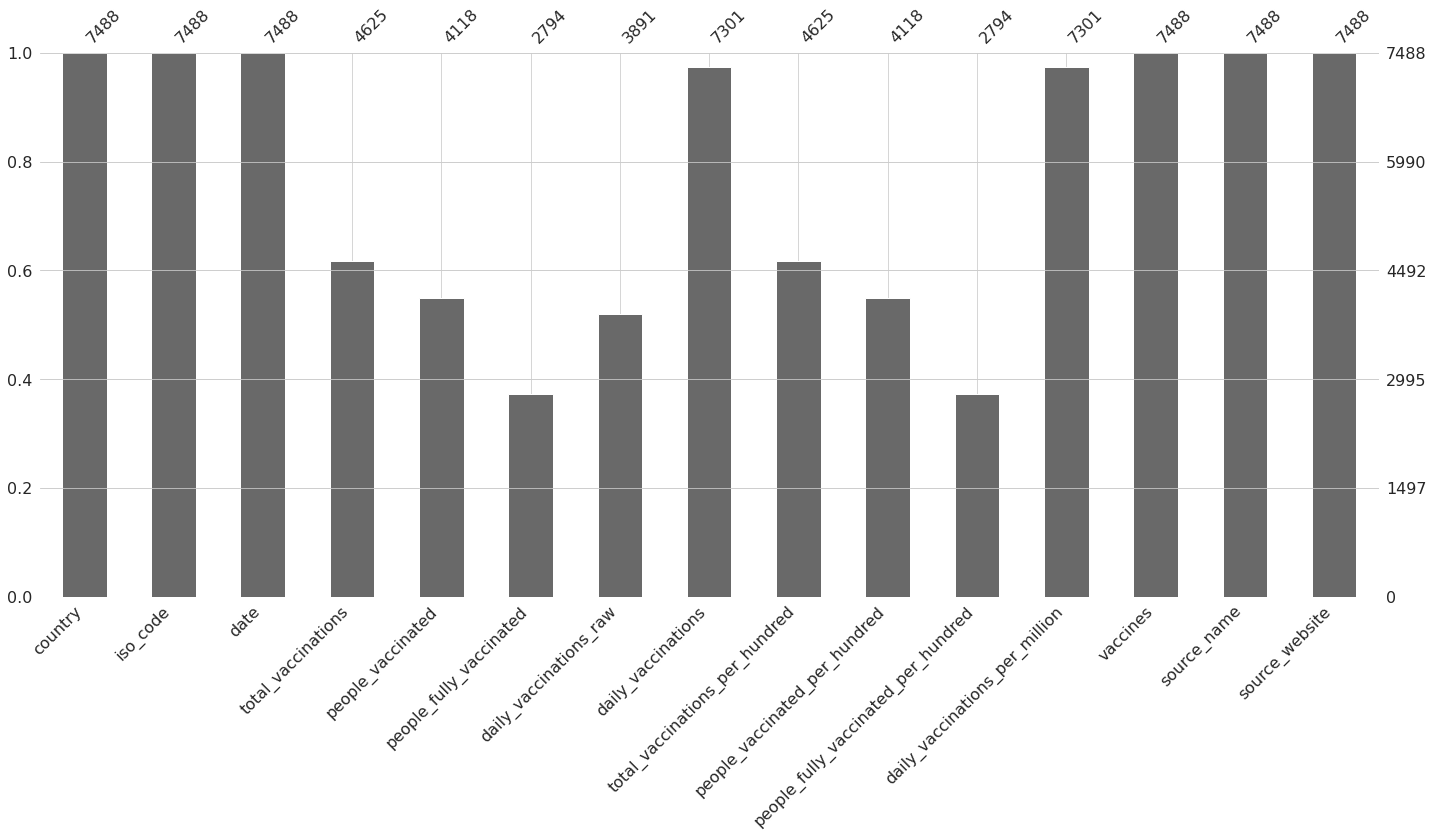

So, seven columns in the dataset have the null values. and people_fully_vaccinated  and   people_fully_vaccinated_per_hundered   have the maximum null values.

# **Hangling the Missing Values**

In this section, we fill all the missing values present in the dataset. This makes our dataset more consistent for performing the EDA.

In [ ]:
df.head()

In [ ]:
data = df.isna().sum()/len(df)
for i in range(len(data)):
    if data[i] != 0.0:
        print(data.index[i], ": ", data[i])

total_vaccinations :  0.38234508547008544

people_vaccinated :  0.4500534188034188

people_fully_vaccinated :  0.6268696581196581

daily_vaccinations_raw :  0.48036858974358976

daily_vaccinations :  0.0249732905982906

total_vaccinations_per_hundred :  0.38234508547008544

people_vaccinated_per_hundred :  0.4500534188034188

people_fully_vaccinated_per_hundred :  0.6268696581196581

daily_vaccinations_per_million :  0.0249732905982906

In most of the cases we cannot say that, at the particular date how many people are accuared by the vaccination. So, keep the dataset stable, we fill the missing value with the 0, considoring that at a particular date no one got the vaccine. For the reason, we find out when we perform the EDA.

In [ ]:
df.total_vaccinations.fillna(0.0, inplace=True)
df.people_vaccinated.fillna(0.0, inplace=True)
df.people_fully_vaccinated.fillna(0.0, inplace=True)
df.daily_vaccinations_raw.fillna(0.0, inplace=True)
df.total_vaccinations_per_hundred.fillna(0.0, inplace=True)
df.people_vaccinated_per_hundred.fillna(0.0, inplace=True)
df.people_fully_vaccinated_per_hundred.fillna(0.0, inplace=True)
df.dropna(inplace=True)

In [ ]:
df.isna().sum()/len(df)

So, now we don't have any missing value in our dataset. Currently we fill all the missing value with the 0.0 as we don't have idea about the value to be filled in place of the missing value.

# **Feature** **Engineering**

in this section, we create new fields from the existing dataset so that we can make our prediction more clean and understandable

In [ ]:
df.head()

We can perform the feature engineering over:

**.** date column

**.** vaccines column

In [ ]:
date_month = [date.split('-')[1] for date in df.date]
df['date_month'] = date_month

In [ ]:
vaccines = []
for vaccine in df.vaccines:
    vaccines.extend(vaccine.split(','))
vaccines_update = {}
for i in vaccines:
    vaccines_update[i] = vaccines.count(i)
vaccines_update

#  **2**. **Exploratory** **Data** **Statistical** **Analysis**

In this section, we perform the EDA to understand the dataset and make the possible prediction at the end of the notebook. But before that we create some set of questions which we anser while performing the EDA.

**Question**

What vaccines are used and in which countries?

What country is vaccinated more people?

What country is vaccinated a larger percent from its population?

In which country the vaccination programme is more advanced?

Where are vaccinated more people per day? But in terms of percent from entire population ?

In which month the number of people who vaccinated is most?

How many people are fully vaccinated (country wise)?

In [ ]:
df.head()

In [ ]:
data = df.groupby('country')['vaccines'].unique()
data_df = pd.DataFrame(data)

In [ ]:
data_df.style

In [ ]:
plt.figure(figsize=(20, 6))
df.groupby('country')['total_vaccinations'].max().sort_values(ascending=False)[:50].plot(kind='bar');

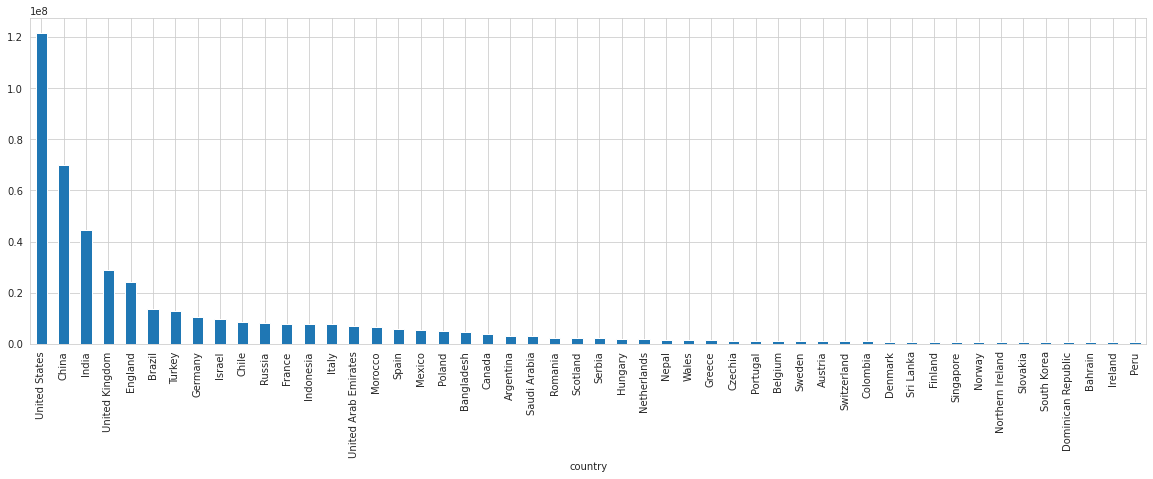

So, this grapg shows that United States, United Kingdom, England, India and China are the top five country that are vaccinating maximum people in a day.

In [ ]:
plt.figure(figsize=(20, 6))
data = df.groupby('country')['total_vaccinations_per_hundred'].max().sort_values(ascending=False)[:50]
plt.bar(data.index, data);
plt.xticks(rotation='90')
plt.yticks(np.arange(10.0, 160.0, step=20.0))
plt.title('Country vise Total Vaccination per Hundred', fontsize=24, fontweight='bold')
plt.ylabel('total vaccination per hundred');

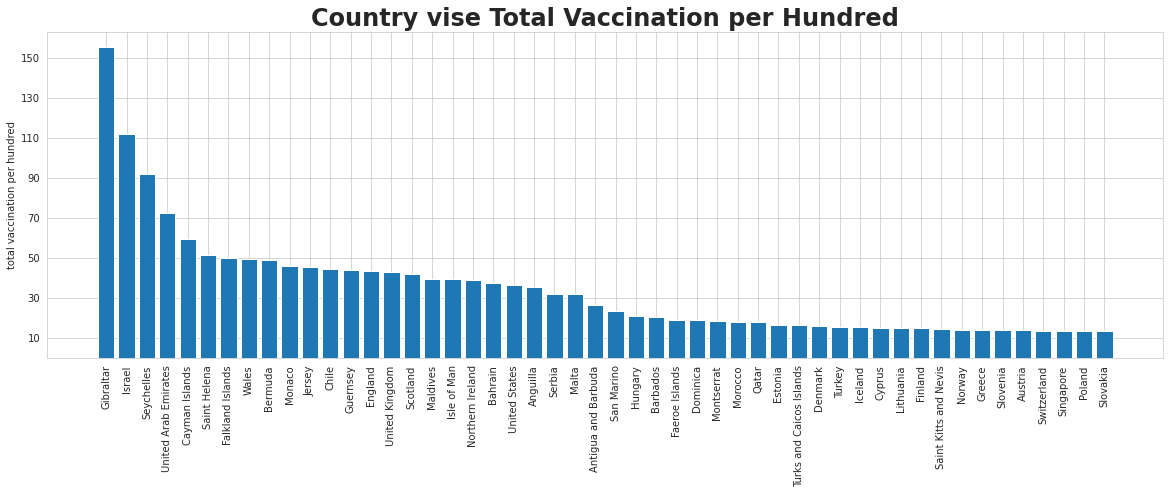

Gibraltar is with the most people vaccinated (per hundred). May be due to less population (33,701 in 2019).

In [ ]:
plt.figure(figsize=(20, 6))
df.groupby('country')['daily_vaccinations_per_million'].max().sort_values(ascending=False)[:50].plot(kind='bar')
plt.ylabel('daily vaccinations per million')
plt.title('Daily Vaccination in Country (in ppm)', fontsize=24, fontweight='bold');

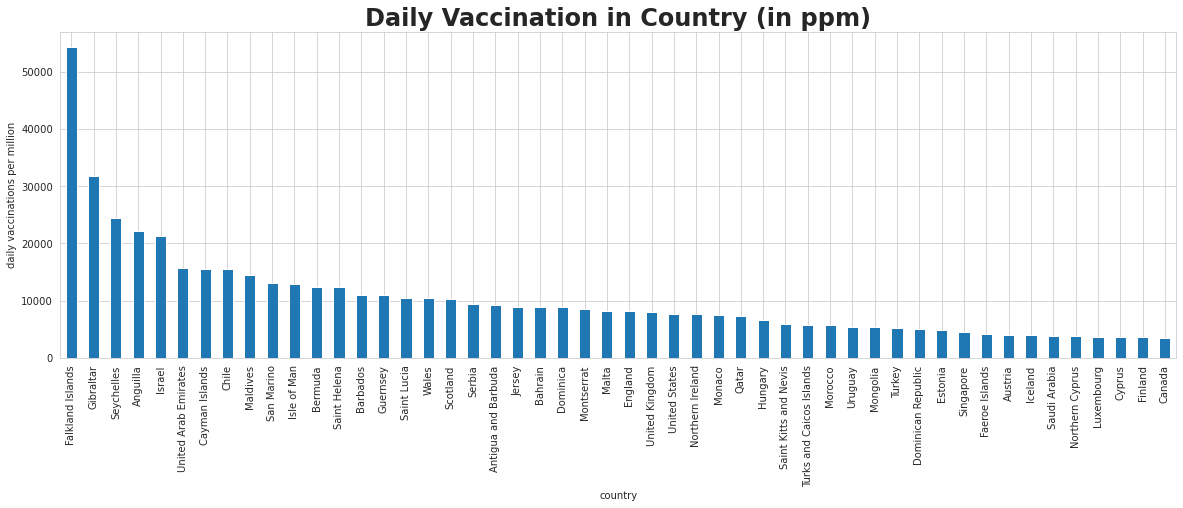

Falkland Islands is the leading country in vaccinated the people daily. It may be less population on islands so they cover there most of the people in getting the part the vaccination program.

In [ ]:
data = df.groupby('date_month')['daily_vaccinations'].sum().sort_values(ascending=False)
plt.bar(data.index, data);
plt.xlabel('month');
plt.ylabel('total vaccination in month')
plt.title('Total Vaccination in a Month all over the World', fontsize=11, fontweight='bold');

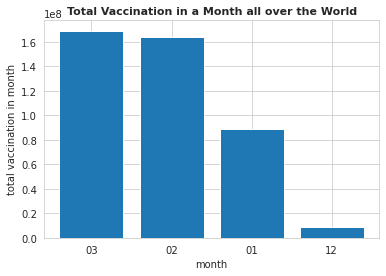

In March, maximum people got vaccinated all over the month. As most of the country in March have a vaccine so they try to vaccinate there population as much it is possible.

In [ ]:
plt.figure(figsize=(20, 6))
df.groupby('country')['people_fully_vaccinated_per_hundred'].max().sort_values(ascending=False)[:50].plot(kind='bar')
plt.ylabel('people_fully_vaccinated_per_hundred')
plt.title('People fully vaccinated in Country', fontsize=24, fontweight='bold');

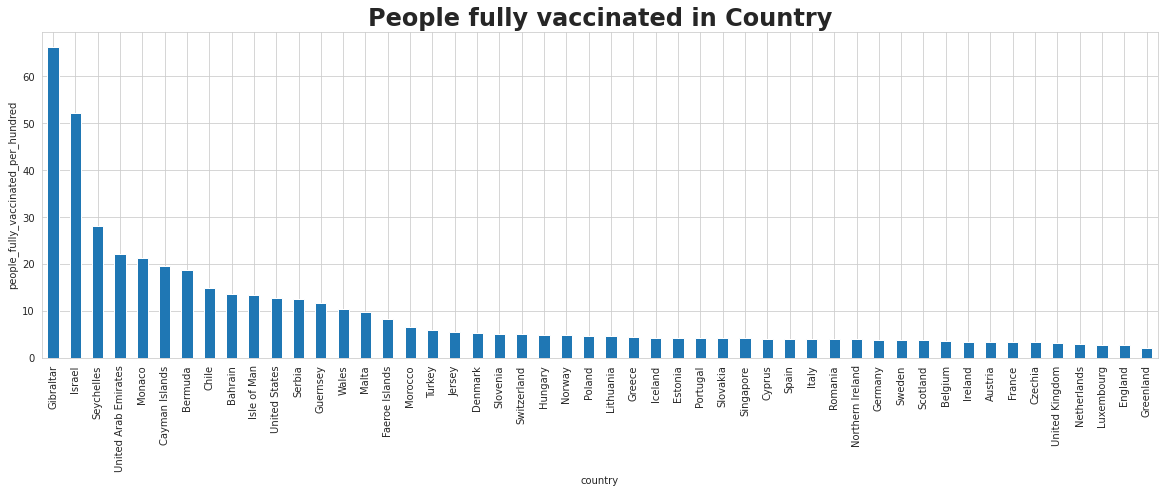

In Gabraltar, maximum people got vaccinated all over the world. As it have less population as comparison to others so it covers its all population more fastly as others.

# **3. Visualization**

The COVID-19 pandemic, also known as the coronavirus pandemic, is an ongoing global pandemic of coronavirus disease 2019 (COVID-19) caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The virus was first identified in December 2019 in Wuhan, China.The pandemic has resulted in significant global social and economic disruption, and is one of the most deadliest pandemics in history. (Source: Wikipedia)

This notebook provides further visualisation of COVID-19 data and a workflow to construct simple ML model for predictions. Statistics related to the pandemic has been covered extensively, I aim to present a few different angles in this notebook

Many thanks to the awesome team at https://ourworldindata.org/ for this expanded dataset!

# **Contents of this notebook:**
**.** Recap of pandemic impacts world-wide

**.** Current trends by continents

**.** High risk countries - in the last 28 days

**.** Effectiveness of vaccination programs

**.** Infection rate analysis & modelling

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline
sns.set_theme(style='darkgrid', palette='deep')

# number format function for Matplotlib
number_format = lambda x, p: format(int(x), ',') # adding a , seprator to thousands

# read latest data
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv', parse_dates=['date'])

# copy non-country data (e.g. World, continent) to a new df
df_aggregate = df[df['continent'].isna()]

# remove non-country data from current df
df = df[df['continent'].notna()]

## **Impacts of COVID-19 pandemic world-wide**
As of early May 2021, more than 160 millions COVID-19 cases have been reported, with more than 3 million deaths world wide - making it one of the deadliest pandemic in history :(

With the rate of new infections continues to climb globally, please don't let your guard down! Continue to practice preventive measures where possible: social distancing, wearing masks in public, washing hands regularly - all will help.

In [ ]:

# plot total cases and deaths globally
with sns.axes_style("white"):
    fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(12, 5))

    # plot total cases world-wide
    total_cases = df_aggregate.pivot(index='date', columns='location', values='total_cases')
    total_cases['World'].plot(ax=ax, kind='line', ylabel='Total Cases')
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(number_format))
    ax.set_title('World-wide total Cases and Deaths')
    ax.xaxis.label.set_visible(False)

    # plot total deaths world-wide
    ax_ext = ax.twinx()
    total_deaths = df_aggregate.pivot(index='date', columns='location', values='total_deaths')
    total_deaths['World'].plot(ax=ax_ext, kind='line', style='r--', grid=False)
    ax_ext.tick_params(axis='y', labelcolor='tab:red')
    ax_ext.yaxis.set_major_formatter(tkr.FuncFormatter(number_format))
    ax_ext.set_ylabel( ylabel='Total Deaths', color='tab:red')

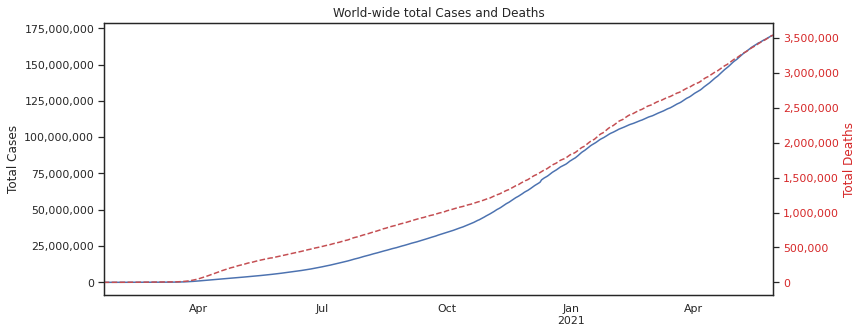

## **New cases & deaths by Continents**
**.** Since the start of pandemic, **North America and Europe** have accounted for the majority of new Covid-19 cases and related deaths.

**.** However, in recent months (since March 2021), **Asia** has accounted for most of new Covid-19 cases, by far.

**.** **South America** has also reported signicant number of Covid-19 related deaths recently - at a similar level compared to Asia, despite having much lower number of cases.

 **.** Across all continents, number of new infections seem to peak at around 800,000 new cases per day recently - and number of deaths has peaked in Feb-2021, at around 14,000 per day. With vaccination programs starting around the world, hopefully the worst is now behind us.

In [ ]:

# list of continents
continents = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

# create plot figure
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 10))

# plot new cases by continent
new_cases = df_aggregate.pivot(index='date', columns='location', values='new_cases_smoothed')
new_cases[continents].plot(ax=ax1, kind='area', ylabel='New Cases')
ax1.yaxis.set_major_formatter(tkr.FuncFormatter(number_format))

# plot new deaths by continent
new_deaths = df_aggregate.pivot(index='date', columns='location', values='new_deaths_smoothed')
new_deaths[new_deaths < 0] = 0 # removing negative death record in Oceania
new_deaths[continents].plot(ax=ax2, kind='area', ylabel='New Deaths', xlabel='Date')
ax2.yaxis.set_major_formatter(tkr.FuncFormatter(number_format))
ax2.xaxis.label.set_visible(False)

# plots format
fig.suptitle('New Cases and Deaths by Continents', size=16)
plt.show()

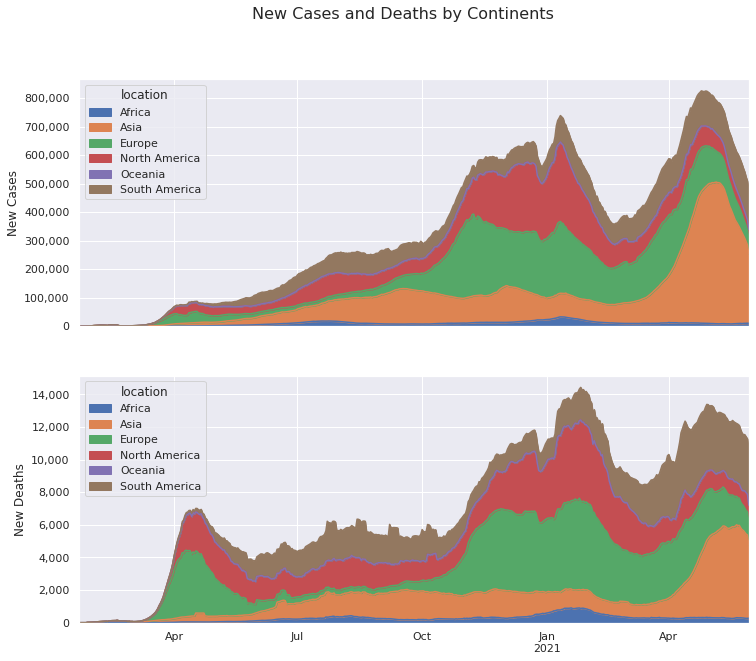

## **Countries at risk - highest infection rates & new cases**

In [ ]:
# recent period (in days)
period = 28

# end date of period = most recent date - 1 day
# adjusted due to delay between countries' data
end = df['date'].max() - pd.to_timedelta(1, unit='D')

# start date of recent period
start = end - pd.to_timedelta(period, unit='D')
print('For recent period between: {:%d-%b-%Y} to {:%d-%b-%Y}'.format(start, end))

# create df with data from recent period (defined above)
df_recent = df.loc[(df['date'] >= start) & (df['date'] <= end), :]

# average by Country
df_avg = df_recent.groupby('location').mean()

# rank by Country's average new cases and new cases rate
df_rank = df_avg[['new_cases', 'new_cases_per_million']].rank(method='min', ascending=False)

# countries with highest avg new case in recent period
top10_new_cases = df_rank[df_rank['new_cases'] <= 10].index

# countries with highest avg new case rate (new case per million) in recent period
top10_new_cases_rate = df_rank[df_rank['new_cases_per_million'] <= 10].index

# countries with highest avg new case rate and at bottom 50% of GDP per Capita
gdp_median = df_avg['gdp_per_capita'].median()
df_rank_low_gdp = df_avg.loc[df_avg['gdp_per_capita'] <= gdp_median,
                     ['new_cases', 'new_cases_per_million']].rank(method='min', ascending=False)
top10_new_cases_rate_low_gdp = df_rank_low_gdp[df_rank_low_gdp['new_cases_per_million'] <= 10].index

For recent period between: 01-May-2021 to 29-May-2021


**.** The chart below shows daily new cases for 10 countries with the highest new cases recently.

**.** India, as covered in world-wide media, unfornately is dealing with a very difficult situations.The recent numbers of new cases daily has by far exceeded previous records :(

In [ ]:
# plot countries with highest avg new case in recent period
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(data=df[df['location'].isin(top10_new_cases)], x='date', y='new_cases_smoothed', hue='location', ax=ax)
ax.yaxis.set_major_formatter(tkr.FuncFormatter(number_format))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax.xaxis.label.set_visible(False)
ax.set_title('Countries with highest avg. number of infections (new cases) - last {} days'.format(period))
plt.show()

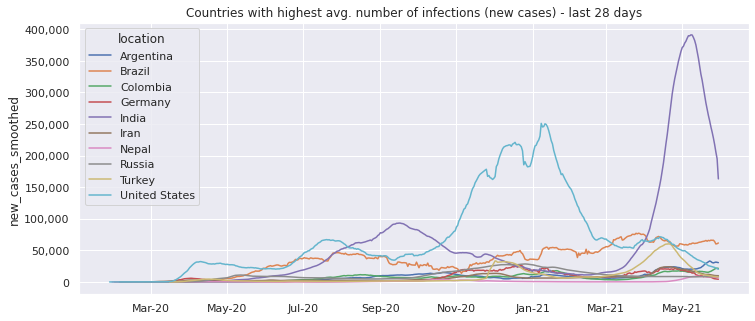



* The chart below shows top 10 countries with the highest infection rates (new cases per million) world-wide.


*  Some countries with the highest recent infection rates (> 1,000 per million) are: Seychelles, Maldives, Uruguay and Cyprus




In [ ]:
# plot countries with highest avg new case per million in recent period
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(data=df[df['location'].isin(top10_new_cases_rate)], x='date', y='new_cases_smoothed_per_million', hue='location', ax=ax)
ax.yaxis.set_major_formatter(tkr.FuncFormatter(number_format))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax.xaxis.label.set_visible(False)
ax.set_title('Countries with highest avg. infection rate (new case per million) - last {} days'.format(period))
plt.show()

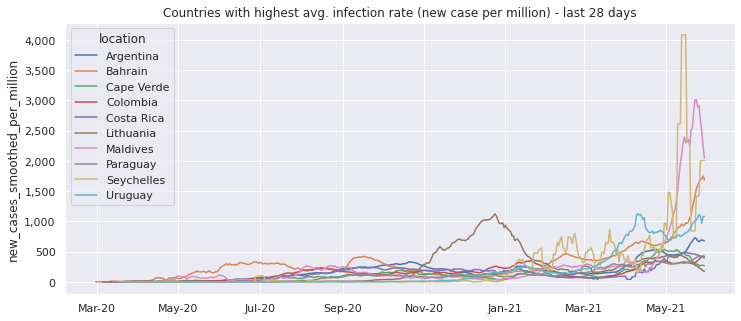



*   The chart below shows less wealthy countries (bottom 50% GPD per capita) that are having highest infection rates recently.
*   Of those, countries with the highest recent infection rates are: Jordan, Cape Verde, Mongolia, Palestine, Georgia.



In [ ]:
# plot low GDP countries (bottom 50%) with highest avg new case per million in recent period
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(data=df[df['location'].isin(top10_new_cases_rate_low_gdp)], x='date', y='new_cases_smoothed_per_million', hue='location', ax=ax)
ax.yaxis.set_major_formatter(tkr.FuncFormatter(number_format))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax.xaxis.label.set_visible(False)
ax.set_title('Countries with bottom 50% GDP and highest avg. infection rate (new case per million) - last {} days'.format(period))
plt.show()

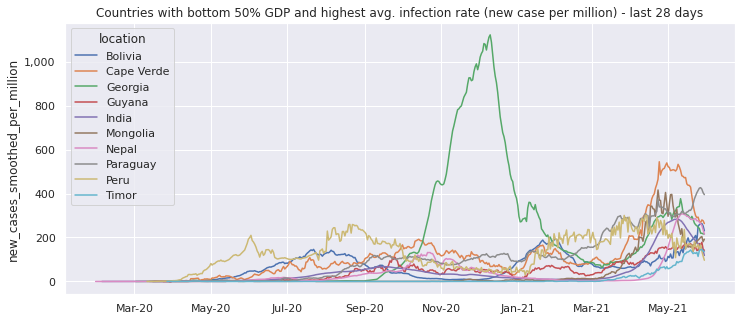

## **Effect of Covid-19 Vaccinations**



**.** Data seems to indicate possitive effectivess of vaccines - reducing both infection rates and death rates.   



In [ ]:
# countries with reported vaccinations as of most recent data point
end_vac = end - pd.to_timedelta(1, unit='D') # data for vaccination date is typically up to 2 days delay
df_vac = df[(df['date'] == end_vac) & (df['total_vaccinations_per_hundred'] > 0)]
df_vac = df_vac.sort_values('total_vaccinations_per_hundred', ascending=False) # sort by vaccination rate

# print summary
country_count = df['location'].nunique()
country_vac_count = df_vac['location'].nunique()

print('{} out of {} countries world wide reported vaccination progress - Date: {:%d-%b-%y}'.format(country_vac_count, country_count, end_vac))
print('-'*85)
print('Top 10 with highest vaccination rate:')
print(df_vac[['location', 'total_vaccinations_per_hundred']].head(10))

In [ ]:
83 out of 221 countries world wide reported vaccination progress - Date: 28-May-21
-------------------------------------------------------------------------------------
Top 10 with highest vaccination rate:
                   location  total_vaccinations_per_hundred
32952             Gibraltar                          229.23
87021  United Arab Emirates                          127.86
41578                Israel                          122.21
16010        Cayman Islands                          121.91
52619                 Malta                          115.35
4328                  Aruba                          105.93
41113           Isle of Man                          104.76
7133                Bahrain                           98.24
17351                 Chile                           96.31
34563              Guernsey                           95.14



**.** Below chart indicates that Covid-19 infection rate (new cases per million) has been trending down, as vaccination rate taking up.

In [ ]:

# all historical data for countries with reported vaccinations
df_vac_all = df[df['location'].isin(df_vac['location'])]

# average of all data by dates
df_vac_avg = df_vac_all.groupby('date').mean()

# plot avg. infection rate against vaccination
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.set_title('Average Infection Rate & Vaccincation Rate - for Countries reported vaccination progress')

    # plot new cases (smoothed) per million
    sns.lineplot(data=df_vac_avg, x='date', y='new_cases_smoothed_per_million', ax=ax)
    ax.xaxis.label.set_visible(False)

    # plot vaccination rate per hundred on the same figure
    ax_ext = ax.twinx()
    sns.lineplot(data=df_vac_avg, x='date', y='total_vaccinations_per_hundred', ax=ax_ext, color='forestgreen', linestyle='dotted')
    ax_ext.tick_params(axis='y', labelcolor='forestgreen')
    ax_ext.set_ylabel( ylabel='Vaccination per hundred', color='forestgreen')
    ax_ext.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))

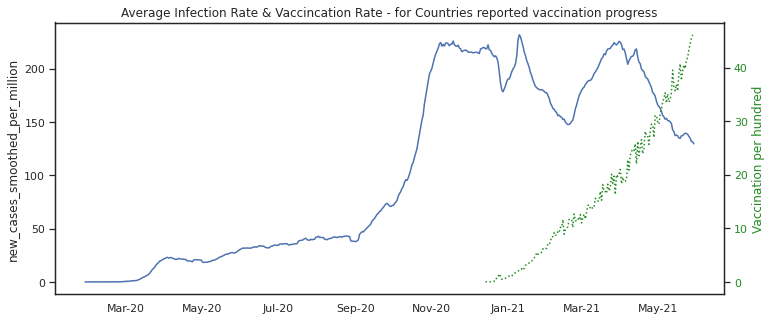

**.** Similar to infection rate, death rate has also been trending down since the start of vaccination programs.

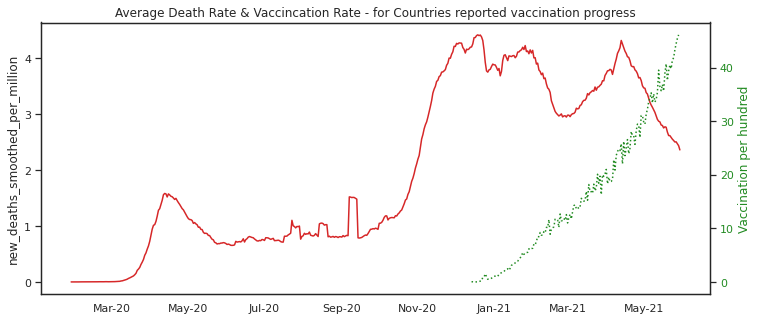

**.** The chart below exammines some of the front runner in vaccination progress.

**.**  **Israel** : new cases and deaths has been trending down - as the country approaches fully vaccinated status, infection rates and death rates is approaching zero in recent days.

**.** **United State**: new cases and deaths has also trended down significantly as vaccination takes up - however, it seems the country is still some way off full-vaccination and recent new cases rate still remains in the 100s range.

In [ ]:

# Function plotting infection rate, death rate and vaccination rate for a country
def plot_country(country, title=''):
    # plot infection rate against vannication rate
    with sns.axes_style("white"):
        fig, (ax1, ax2) = plt.subplots(figsize=(20, 5), nrows=1, ncols=2)
        fig.suptitle('{} - {}'.format(country, title), fontsize=16)

        # plot new deaths (smoothed) per million
        sns.lineplot(data=df[df['location'] == country], x='date', y='new_cases_smoothed_per_million', ax=ax1)
        ax1.xaxis.label.set_visible(False)
        ax1.set_title('Infection Rate & Vaccincation Rate')

        # plot vaccination rate per hundred on the same ax
        ax1_ext = ax1.twinx()
        sns.lineplot(data=df[df['location'] == country], x='date', y='total_vaccinations_per_hundred', ax=ax1_ext, color='forestgreen', linestyle='dotted')
        ax1_ext.tick_params(axis='y', labelcolor='forestgreen')
        ax1_ext.set_ylabel( ylabel='Vaccination per hundred', color='forestgreen')
        ax1_ext.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))

        # plot new deaths (smoothed) per million
        sns.lineplot(data=df[df['location'] == country], x='date', y='new_deaths_smoothed_per_million', ax=ax2, color='tab:red')
        ax2.xaxis.label.set_visible(False)
        ax2.set_title('Death Rate & Vaccincation Rate')

        # plot vaccination rate per hundred on the same ax
        ax2_ext = ax2.twinx()
        sns.lineplot(data=df[df['location'] == country], x='date', y='total_vaccinations_per_hundred', ax=ax2_ext, color='forestgreen', linestyle='dotted')
        ax2_ext.tick_params(axis='y', labelcolor='forestgreen')
        ax2_ext.set_ylabel( ylabel='Vaccination per hundred', color='forestgreen')
        ax2_ext.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))


# plot example countries
# Israel: country with highest vaccination rate
# United States: country with highest vaccination doses
plot_country('Israel', 'country with highest vaccination rate')
plot_country('United States', 'country with highest vaccination doses')

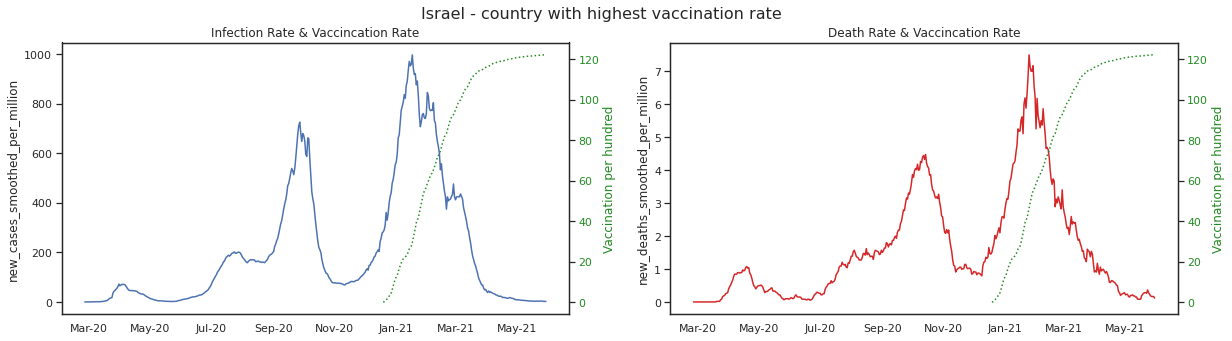

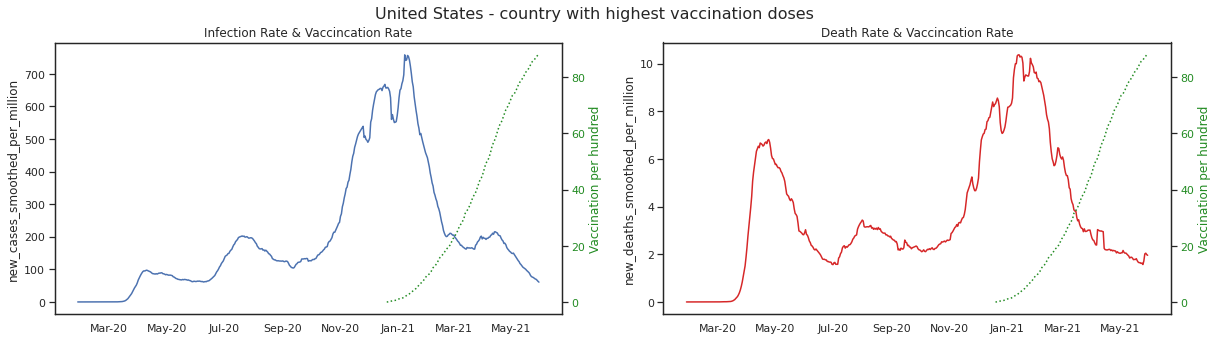

# **Summary**
Vaccination program in all over the world is going at a high rate. In some country, they cover there population at a higher rate as comparisons to other countries while in some country the program is started in a month. In some part of the world, they vaccinated there population from the month of December (2020). In some undeveloped country, it is still not started but few people got the vaccinated (may be due to high profile).

---



---

